<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p> 
<p><font size="5" color='grey'> <b>
Neuronale Netze - Keras Regression - Medical Insurance
</b></font> </br></p> 

---


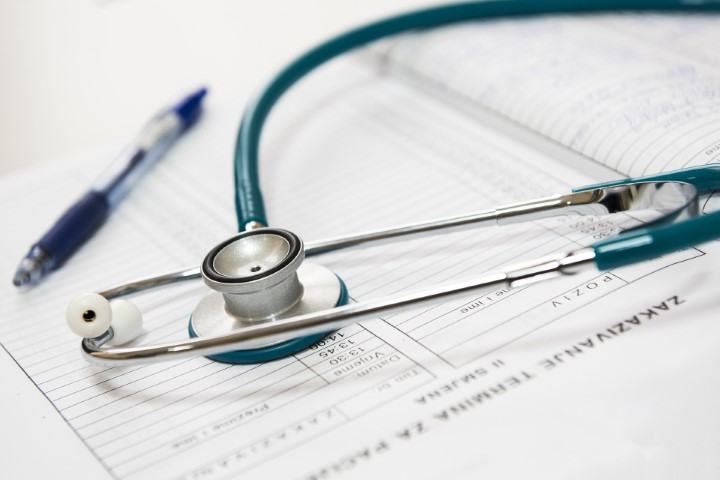

Image by <a href="https://pixabay.com/users/darkostojanovic-638422/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Darko Stojanovic</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=563427">Pixabay</a>

# **1 <font color='orange'>|</font> Understand**
***


<p><font color='black' size="5">
Warnungen ausstellen
</font></p>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

<p><font color='black' size="5">
Anwendungsfall
</font></p>

---   

Der Datensatz enthält Informationen zu Kosten für Krankenversicherungen in Abhängigkeit gesundheitlichen Merkmalen.


[DataSet](https://www.kaggle.com/datasets/mirichoi0218/insurance)

[Info](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Insurance.csv')

In [ ]:
label = 'charges'
features =[ x for x in df.columns if x != label]

In [ ]:
target = df[label].copy()
data = df[features].copy()

<p><font color='black' size="5">
EDA (Exploratory Data Analysis) mit Pandas
</font></p>

In [ ]:
data.info()

In [ ]:
data.describe().T

In [ ]:
data.describe(include=object).T

# **2 <font color='orange'>|</font>  Prepare**

---

<p><font color='black' size="5">
Datentyp ermitteln
</font></p>

In [ ]:
all_col = data.columns
num_col = data.select_dtypes(include='number').columns
cat_col = data.select_dtypes(exclude='number').columns

<p><font color='black' size="5">
Codierung
</font></p>

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
data[cat_col] = OrdinalEncoder().fit_transform(data[cat_col])

<p><font color='black' size="5">
Skalierung
</font></p>

In [ ]:
from sklearn.preprocessing import StandardScaler
data[num_col] = StandardScaler().fit_transform(data[num_col])


<p><font color='black' size="5">
Erstellen von Arrays aus DataFrames - wird von Keras erwartet
</font></p>

In [ ]:
import numpy as np

data = np.array(data)
target = np.array(target)
data = np.asarray(data).astype(np.float32)
data.shape, target.shape

# **3 <font color='orange'>|</font> Modeling**
---


<p><font color='black' size="5">
Train-Test-Split
</font></p>

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.3, random_state=42)


<p><font color='black' size="5">
Modellierung des Netzwerkes
</font></p>

<p><font color='black' size="5">
Import der Module
</font></p> 

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential


<p><font color='black' size="5">
Schichtweiser Aufbau des Netzwerks
</font></p>

In [ ]:
model = Sequential()
model.add(Dense(units=6, input_dim=6, kernel_initializer='normal', activation='relu'))            # Input Layer
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))           # Hidden Layer
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=600, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))            # Hidden Layer
model.add(Dense(units=600, kernel_initializer='normal', activation='relu'))            # Hidden Layer
model.add(Dense(units=8, kernel_initializer='normal', activation='relu'))           # Hidden Layer
model.add(Dense(1, kernel_initializer='normal'))         # Output Layer

In [ ]:
model.summary()


<p><font color='black' size="5">
Modell compilieren
</font></p>

In [ ]:
from tensorflow import keras
import tensorflow as tf

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=[tf.keras.metrics.RootMeanSquaredError()])


<p><font color='black' size="5">
Training & Ergebnisse für Tensorboard aufbereiten
</font></p>

In [ ]:
history = model.fit(data_train, target_train, epochs=100, validation_split=0.3)

In [ ]:
print(history.params)
print(history.history.keys())

# **4 <font color='orange'>|</font> Evaluate**
---

<p><font color='black' size="5">
Loss/MSE
</font></p>

In [ ]:
train_loss, train_root_mean_squared_error = model.evaluate(data_train, target_train)
train_loss, train_root_mean_squared_error

In [ ]:
test_loss, test_root_mean_squared_error = model.evaluate(data_test, target_test)
test_loss, test_root_mean_squared_error

<p><font color='black' size="5">
Prognose
</font></p>

In [ ]:
target_train_pred = model.predict(data_train)
target_test_pred = model.predict(data_test)

<p><font color='black' size="5">
Bestimmtheitsmass
</font></p>

In [ ]:
from sklearn.metrics import r2_score
r2_train = r2_score(target_train, target_train_pred)
print(f'Modell: {model} -- Train --- Bestimmtheitsmass: {r2_train:5.2f}' )

In [ ]:
r2_test = r2_score(target_test, target_test_pred)
print(f'Modell: {model}\n -- Test --- Bestimmtheitsmass: {r2_test:5.2f}' )

<p><font color='black' size="5">
Real vs Predict
</font></p>

In [ ]:
result = pd.DataFrame()
result['Test'] = target_test
result['Pred'] = target_test_pred
result['%-Delta'] = (result['Test'] - result['Pred']) / result['Test'] * 100
# for i in range(0,20):
#   print(target_pred[i], target_test[i])
%precision 3
result.style.format("{:.2f}")

# **5 <font color='orange'>|</font> Deploy**
---